In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Read CSV file
cor_virus=pd.read_csv(r'C:\Users\Geetha\Desktop\Applied ML class\2019_nCoV_data.csv')
#print top 5 rows
cor_virus.head()

,Sno,Province/State,Country,Country_label,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1,1/22/2020 12:00,1,0,0
1,2,Beijing,China,1,1/22/2020 12:00,14,0,0
2,3,Chongqing,China,1,1/22/2020 12:00,6,0,0
3,4,Fujian,China,1,1/22/2020 12:00,1,0,0
4,5,Gansu,China,1,1/22/2020 12:00,0,0,0


In [3]:
cor_virus.loc[cor_virus['Country']=='China','Country_label']='1'
cor_virus.head()

,Sno,Province/State,Country,Country_label,Last Update,Confirmed,Deaths,Recovered
0,1,Anhui,China,1,1/22/2020 12:00,1,0,0
1,2,Beijing,China,1,1/22/2020 12:00,14,0,0
2,3,Chongqing,China,1,1/22/2020 12:00,6,0,0
3,4,Fujian,China,1,1/22/2020 12:00,1,0,0
4,5,Gansu,China,1,1/22/2020 12:00,0,0,0


In [122]:
#gives descriptive parameters
cor_virus.describe()

,Sno,Confirmed,Deaths,Recovered
count,497.000000,497.000000,497.000000,497.000000
mean,249.000000,93.410463,2.134809,1.839034
std,143.615807,509.676135,18.107540,11.344773
min,1.000000,0.000000,0.000000,0.000000
25%,125.000000,2.000000,0.000000,0.000000
50%,249.000000,7.000000,0.000000,0.000000
75%,373.000000,43.000000,0.000000,0.000000
max,497.000000,7153.000000,249.000000,169.000000


In [123]:
#know the column names
cor_virus.columns

Index(['Sno', 'Province/State', 'Country', 'Country_label', 'Last Update',
       'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [124]:
#gives count of rows and columns
cor_virus.shape

(497, 8)

In [128]:
#To know max value of a column. Similarly we can find min value
M_value=max(cor_virus['Confirmed'])
M_value

7153

In [129]:
#info about dataset
cor_virus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 8 columns):
Sno               497 non-null int64
Province/State    393 non-null object
Country           497 non-null object
Country_label     497 non-null object
Last Update       497 non-null object
Confirmed         497 non-null int64
Deaths            497 non-null int64
Recovered         497 non-null int64
dtypes: int64(4), object(4)
memory usage: 31.1+ KB


In [130]:
#bool value will be TRUE if there is a null
cor_virus.isna()

,Sno,Province/State,Country,Country_label,Last Update,Confirmed,Deaths,Recovered
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [4]:
#count of null value
cor_virus.isna().sum()

Sno                 0
Province/State    104
Country             0
Country_label       0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

In [132]:
#extracting Date from last update
cor_virus['Last Update']=pd.to_datetime(cor_virus['Last Update'])
cor_virus['Last Update'].head(5)

0   2020-01-22 12:00:00
1   2020-01-22 12:00:00
2   2020-01-22 12:00:00
3   2020-01-22 12:00:00
4   2020-01-22 12:00:00
Name: Last Update, dtype: datetime64[ns]

In [58]:
cor_virus['Date']=cor_virus['Last Update'].dt.day
cor_virus['Date'].head(5)

0    22
1    22
2    22
3    22
4    22
Name: Date, dtype: int64

In [59]:
#exracting month. Similarly can be done for year, week.
cor_virus['Month']=cor_virus['Last Update'].dt.month
cor_virus['Month'].head(5)

0    1
1    1
2    1
3    1
4    1
Name: Month, dtype: int64

In [133]:
#unique values of column country.
u_country=cor_virus['Country'].unique()
u_country

array(['China', 'US', 'Japan', 'Thailand', 'South Korea',
       'Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'France', 'Nepal', 'Canada', 'Cambodia', 'Sri Lanka',
       'Ivory Coast', 'Germany', 'Finland', 'United Arab Emirates',
       'India', 'Italy', 'Sweden', 'Russia', 'Spain', 'UK'], dtype=object)

In [134]:
u_values={}
j=1
for i in u_country:
    u_values[i]=j
    j=j+1
print(u_values)   

{'China': 1, 'US': 2, 'Japan': 3, 'Thailand': 4, 'South Korea': 5, 'Mainland China': 6, 'Hong Kong': 7, 'Macau': 8, 'Taiwan': 9, 'Singapore': 10, 'Philippines': 11, 'Malaysia': 12, 'Vietnam': 13, 'Australia': 14, 'Mexico': 15, 'Brazil': 16, 'France': 17, 'Nepal': 18, 'Canada': 19, 'Cambodia': 20, 'Sri Lanka': 21, 'Ivory Coast': 22, 'Germany': 23, 'Finland': 24, 'United Arab Emirates': 25, 'India': 26, 'Italy': 27, 'Sweden': 28, 'Russia': 29, 'Spain': 30, 'UK': 31}


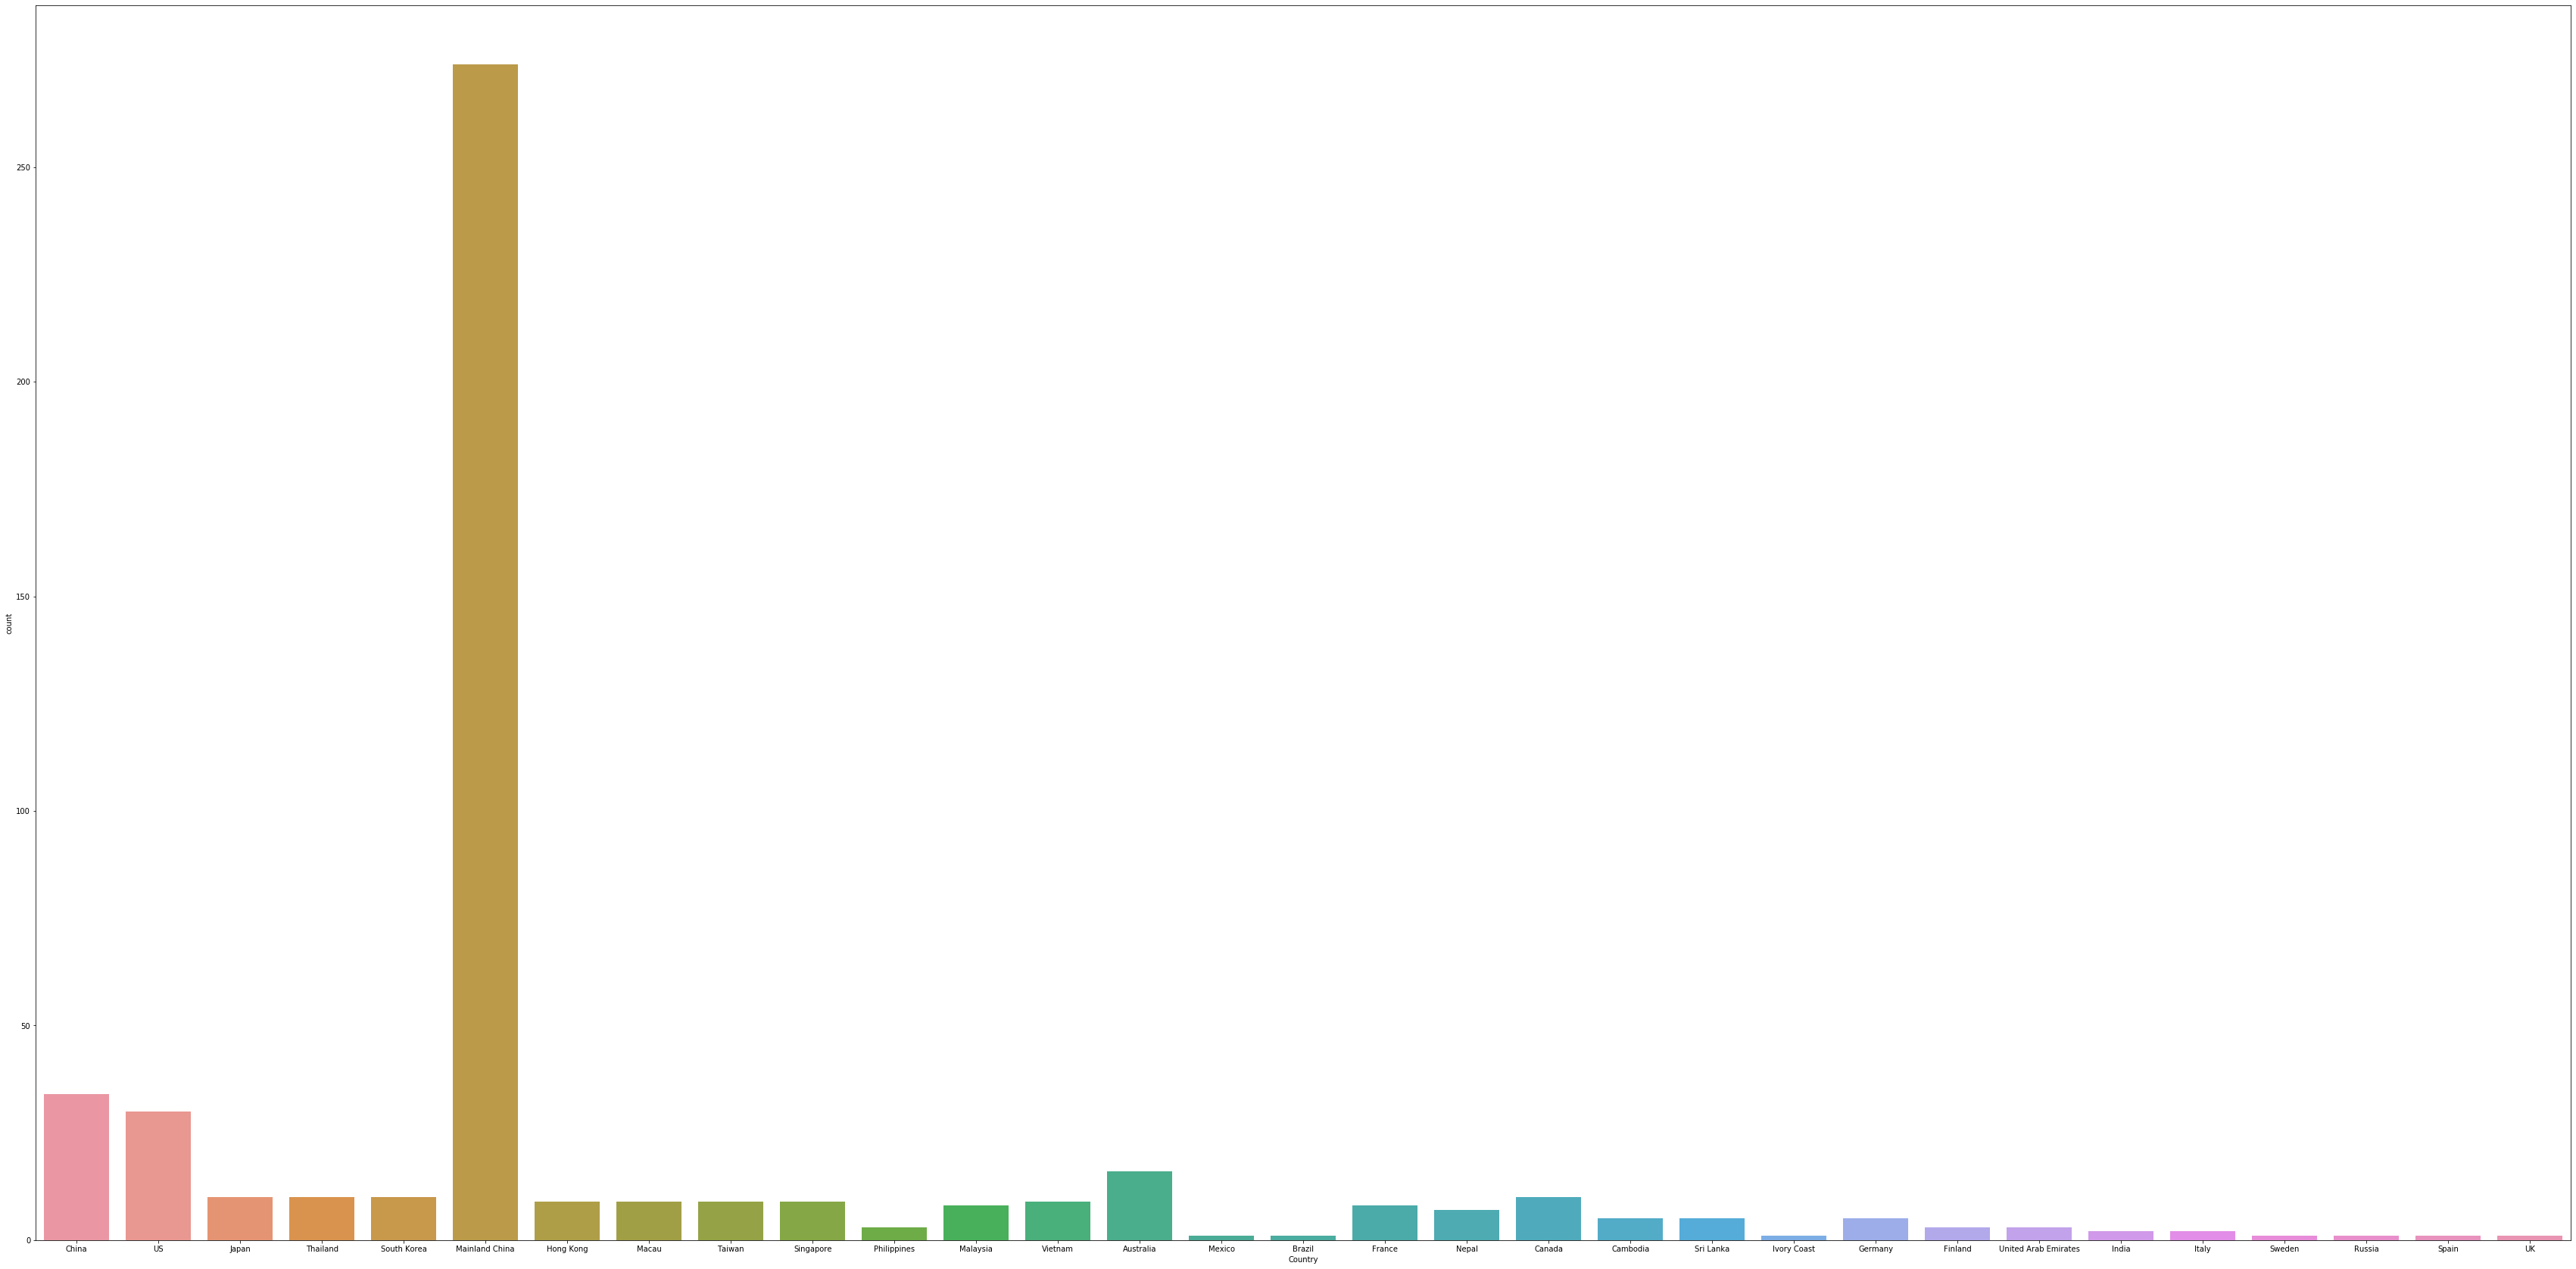

In [135]:
#Country Vs Count
plt.figure(figsize = (60,30))
sns.countplot(x='Country',data=cor_virus)

In [78]:
#sum the count of confirmed cases w.r.t country
CC=cor_virus.groupby('Country')['Confirmed'].sum().reset_index(drop=False).sort_values(by='Confirmed', ascending=True)
CC

,Country,Confirmed
1,Brazil,0.0
16,Mexico,0.0
11,Ivory Coast,0.0
24,Sweden,1.0
22,Spain,1.0
18,Philippines,2.0
27,UK,2.0
9,India,2.0
19,Russia,2.0
5,Finland,3.0


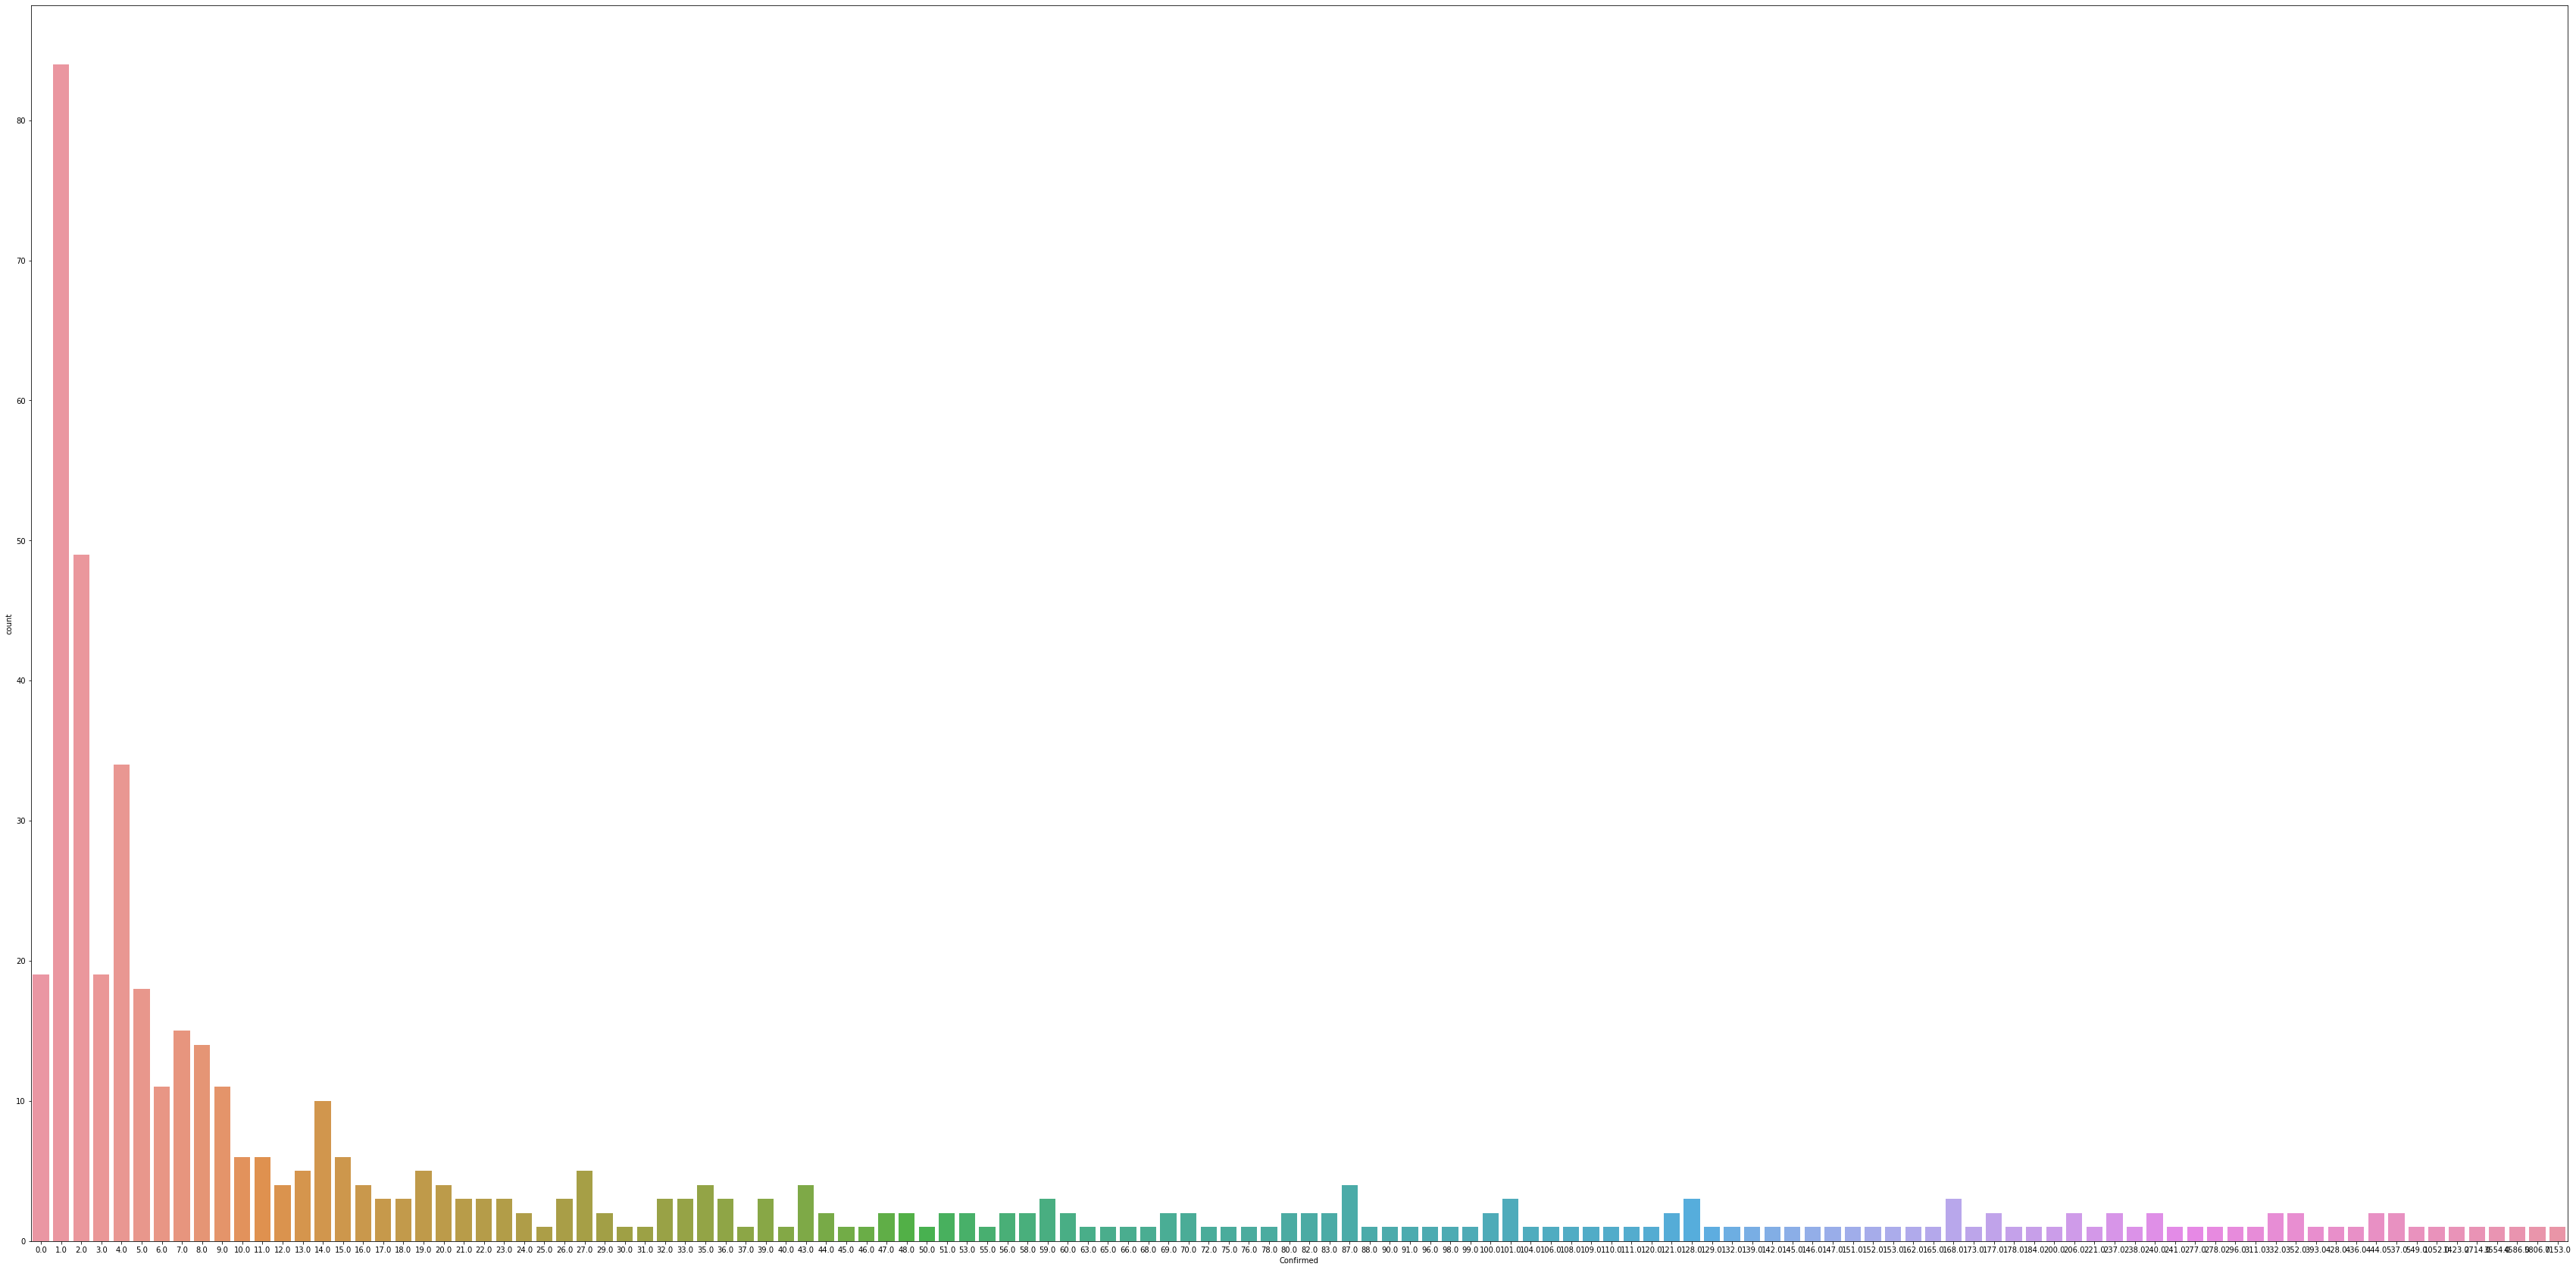

In [79]:
#confirmed Vs Count
plt.figure(figsize = (60,30))
sns.countplot(x='Confirmed',data=cor_virus)

In [83]:
#sum the count of Death cases w.r.t country
CD=cor_virus.groupby('Country')['Deaths'].sum().reset_index(drop=False).sort_values(by='Deaths', ascending=True)
CD

,Country,Deaths
0,Australia,0.0
28,US,0.0
27,UK,0.0
26,Thailand,0.0
25,Taiwan,0.0
24,Sweden,0.0
23,Sri Lanka,0.0
22,Spain,0.0
21,South Korea,0.0
20,Singapore,0.0


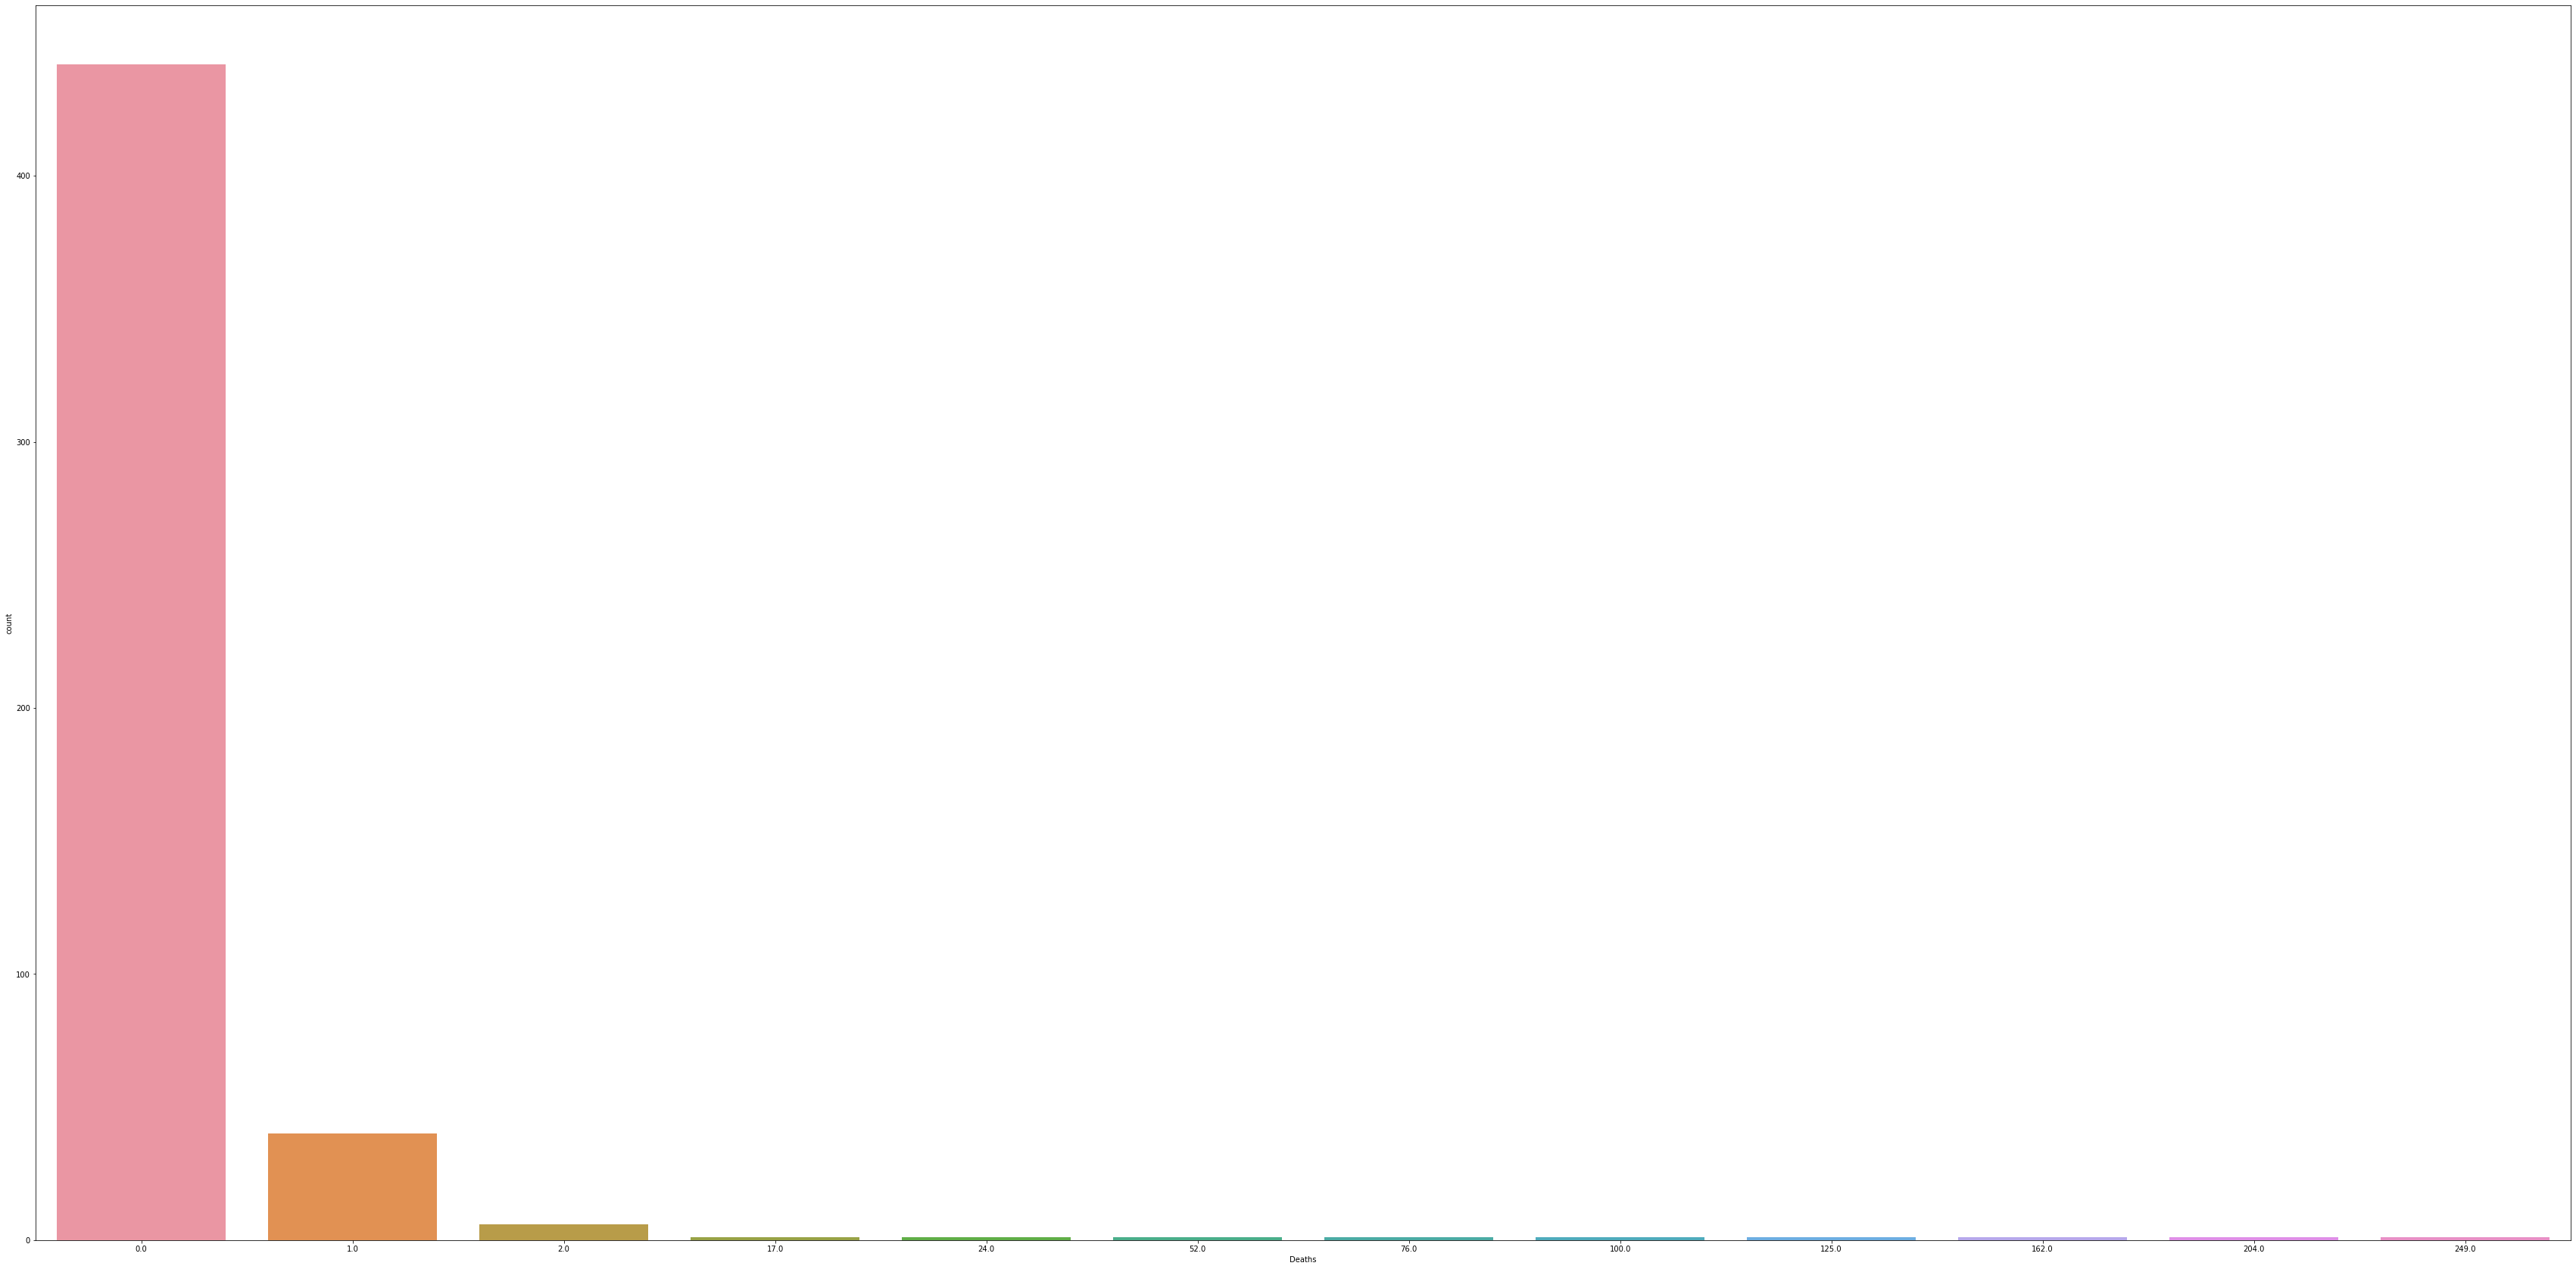

In [84]:
#Deaths Vs Count
plt.figure(figsize = (60,30))
sns.countplot(x='Deaths',data=cor_virus)

In [85]:
#sum the count of Recovered cases w.r.t country
CR=cor_virus.groupby('Country')['Recovered'].sum().reset_index(drop=False).sort_values(by='Recovered', ascending=True)
CR

,Country,Recovered
15,Malaysia,0.0
28,US,0.0
27,UK,0.0
25,Taiwan,0.0
24,Sweden,0.0
23,Sri Lanka,0.0
22,Spain,0.0
21,South Korea,0.0
20,Singapore,0.0
19,Russia,0.0


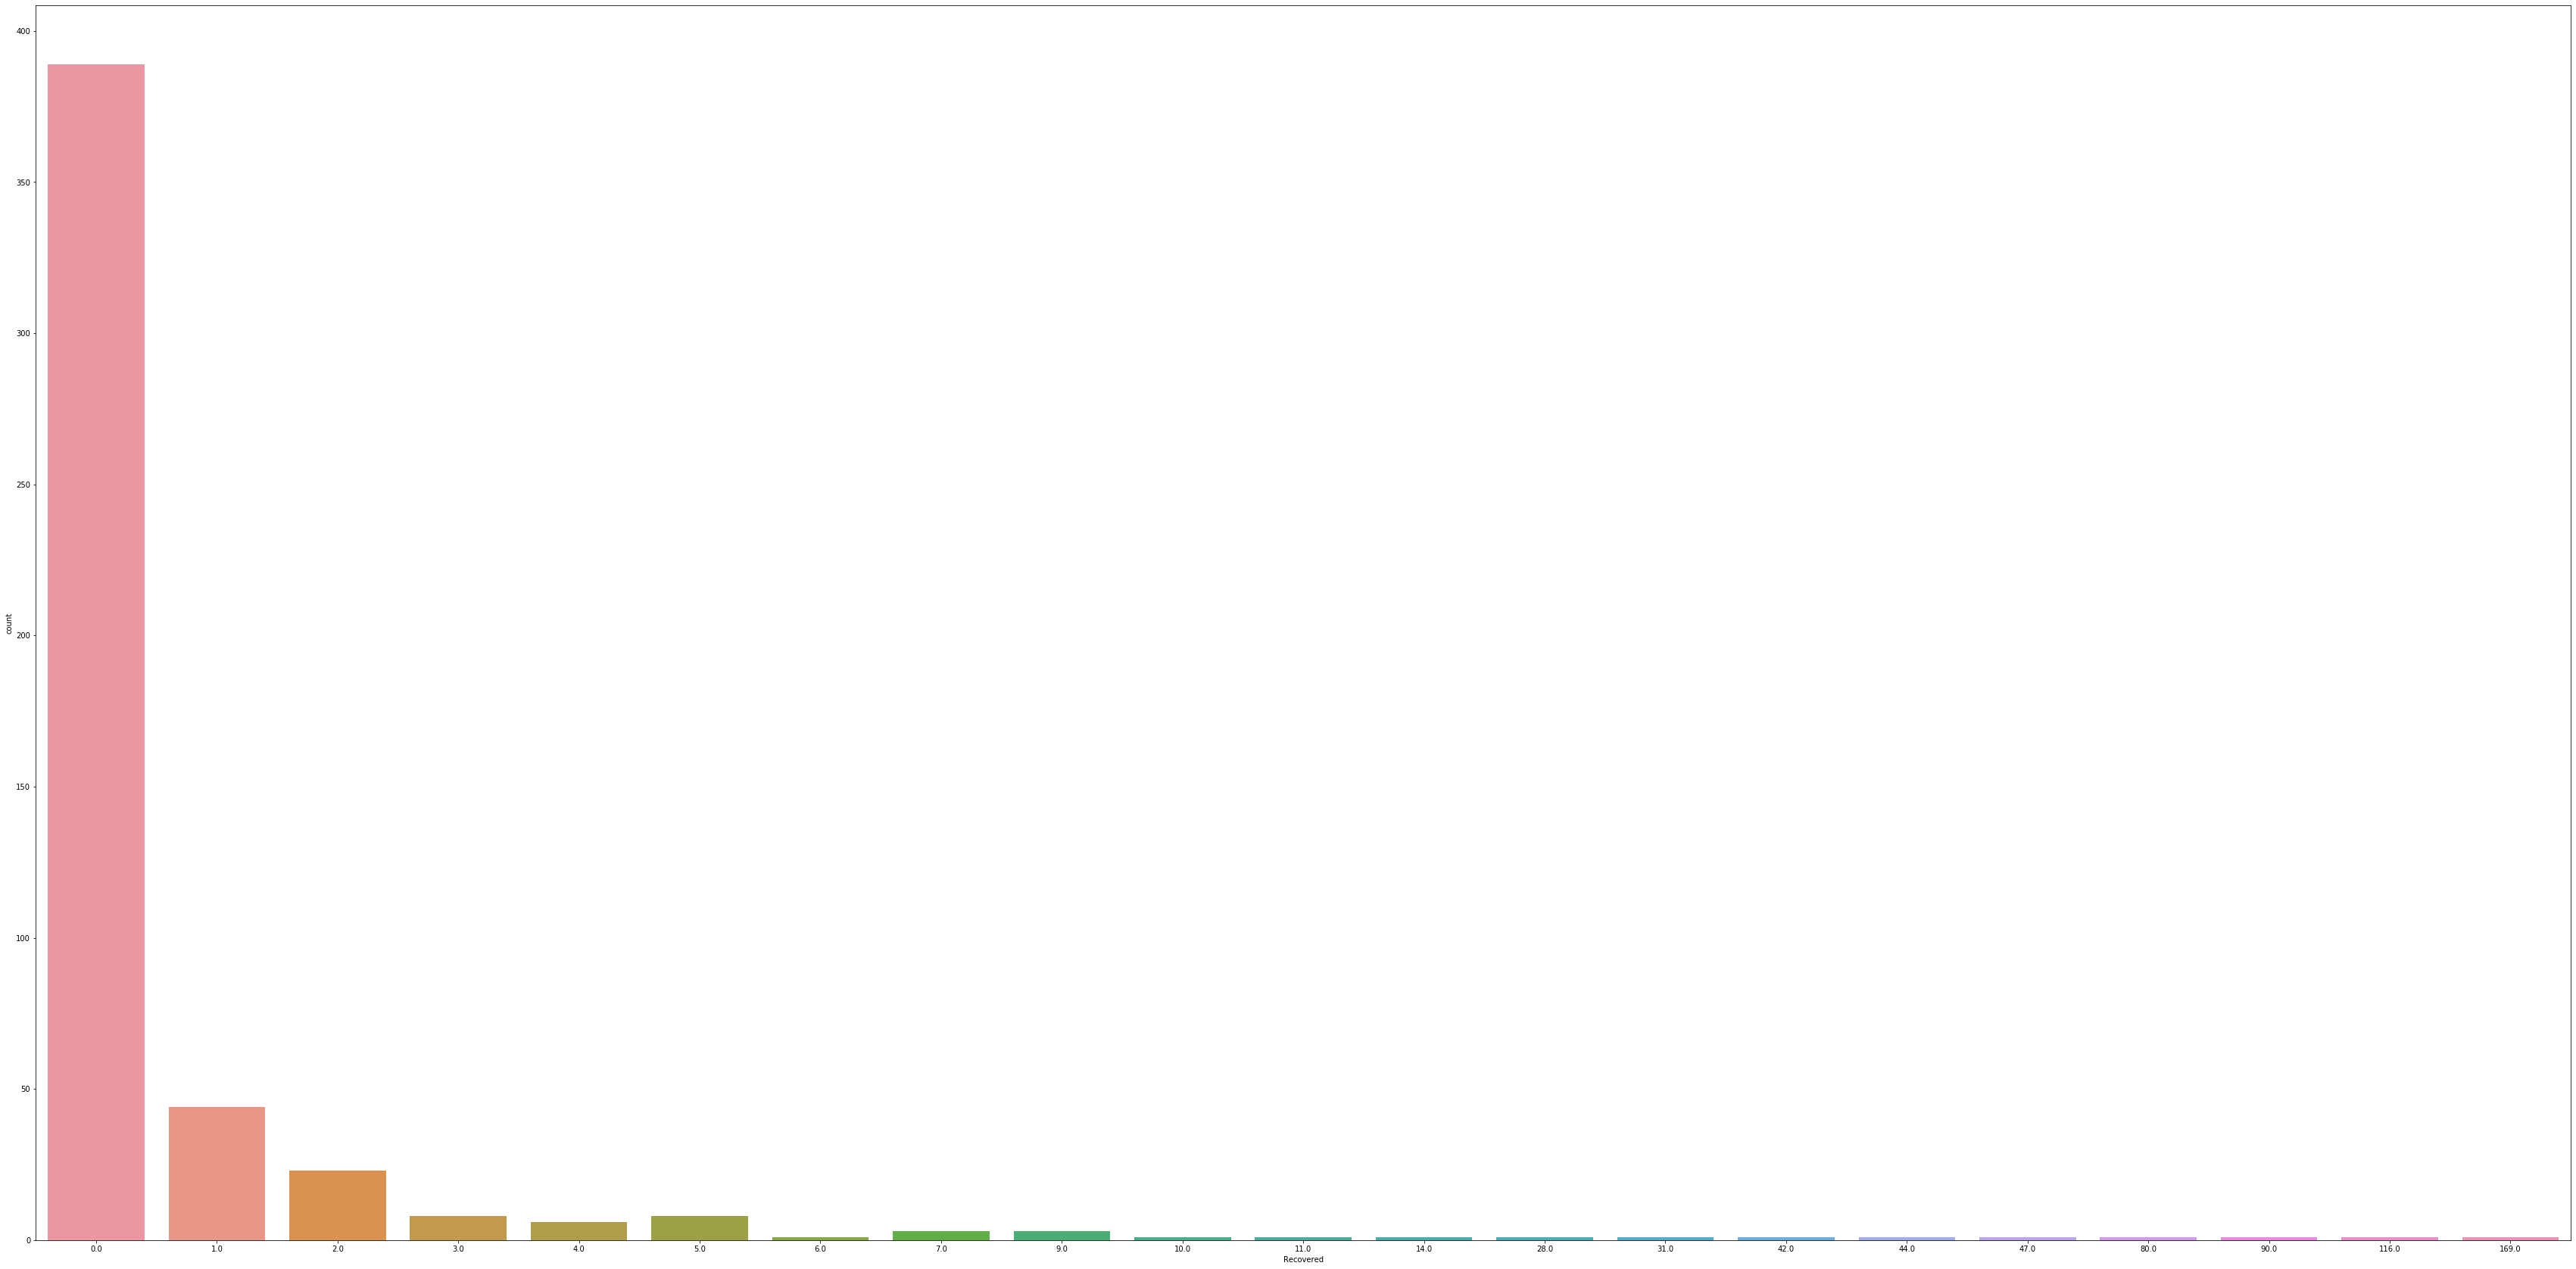

In [86]:
#Recovered Vs Count
plt.figure(figsize = (60,30))
sns.countplot(x='Recovered',data=cor_virus)

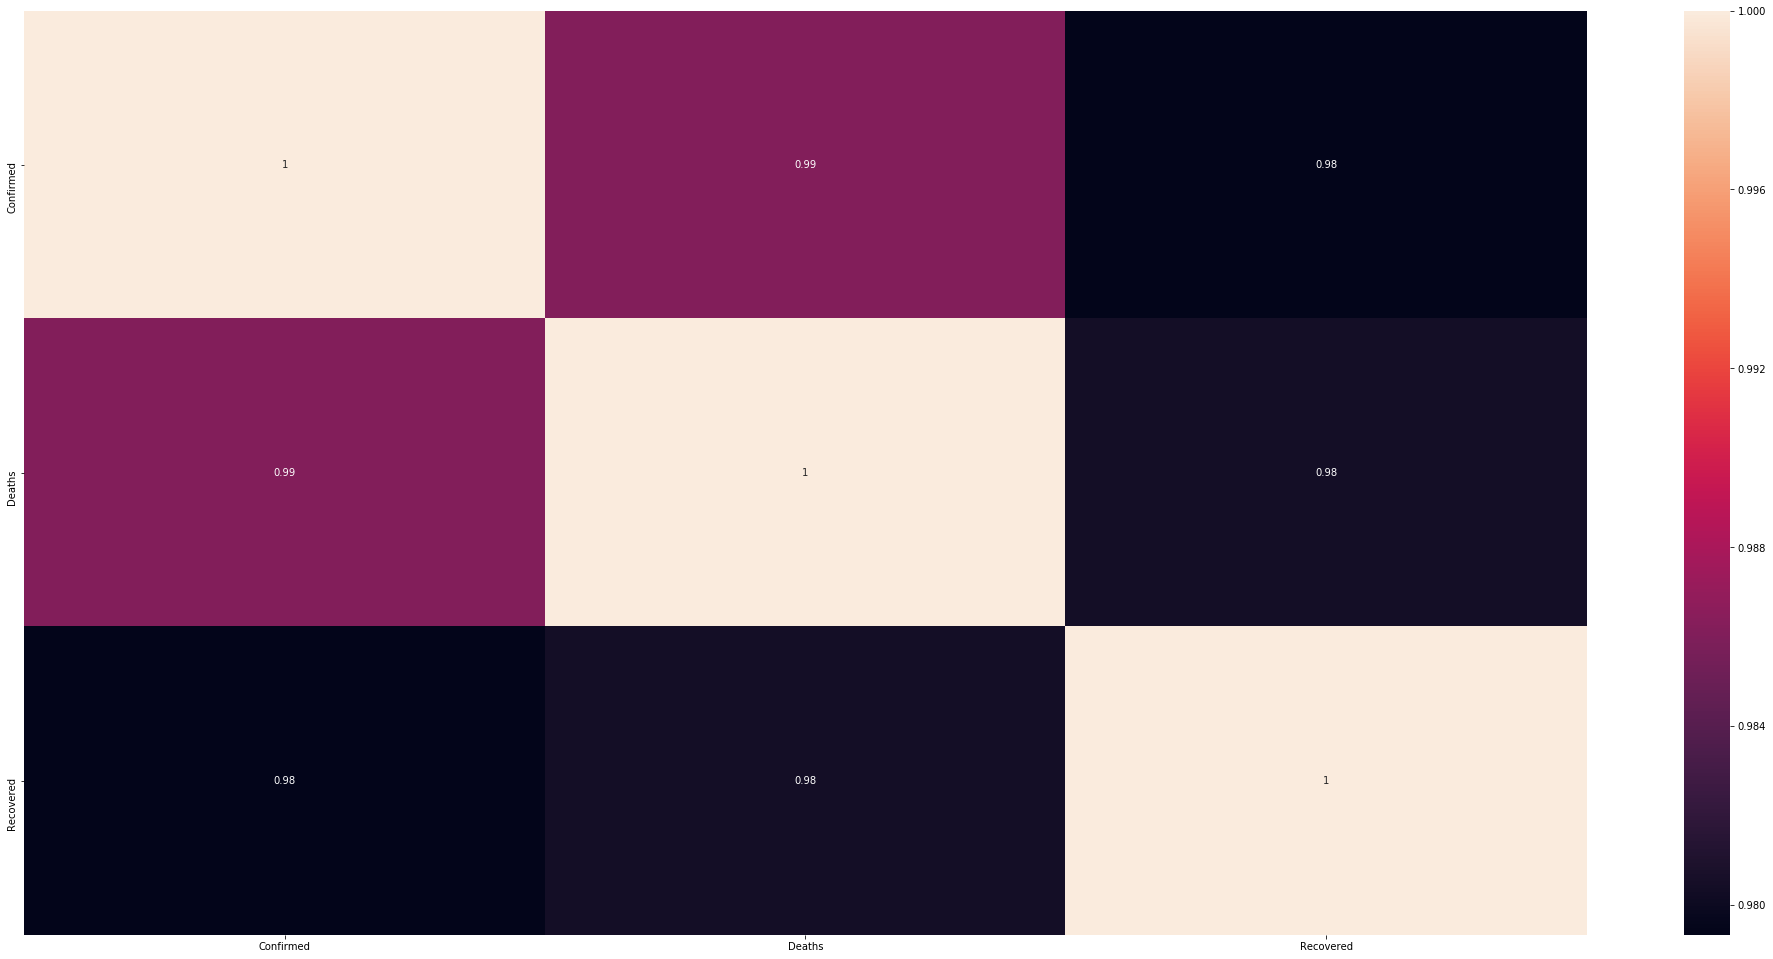

In [94]:
plt.figure(figsize=(35,17))
sns.heatmap(cor_virus.drop('Sno', axis=1).corr(),annot=True)

In [4]:
x=cor_virus[['Confirmed', 'Deaths', 'Recovered']]
y=cor_virus['Country_label']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

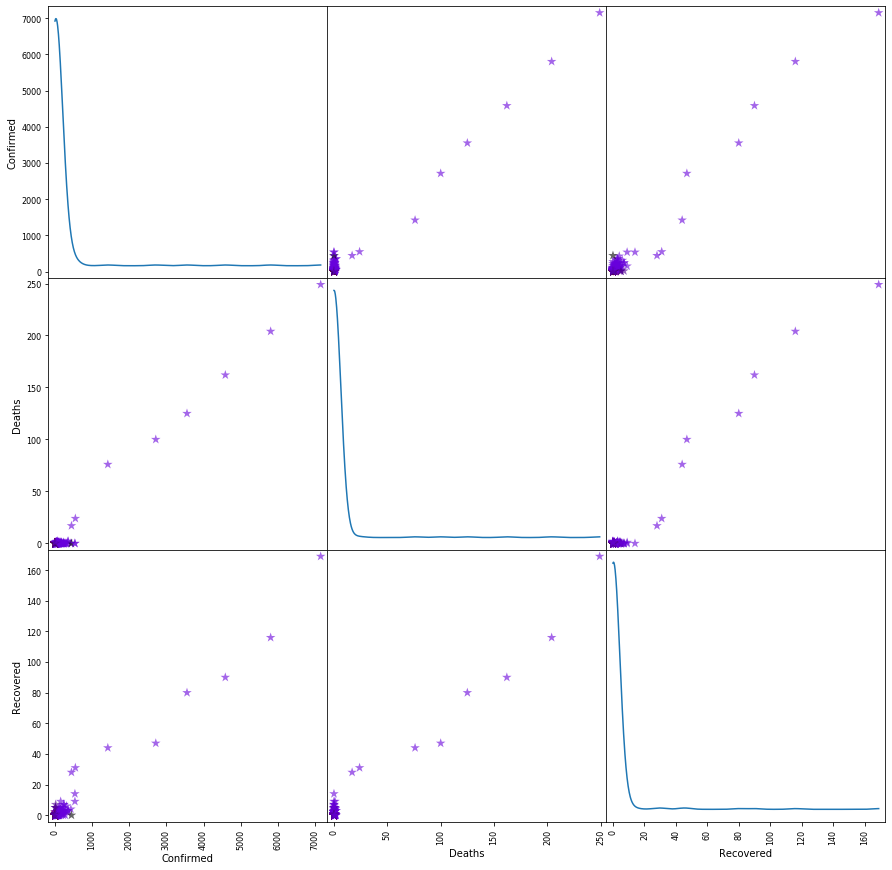

In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(x_train, c= y_train, marker = '*', diagonal='kde',s=100, alpha=0.6, figsize=(15,15),cmap=cmap)

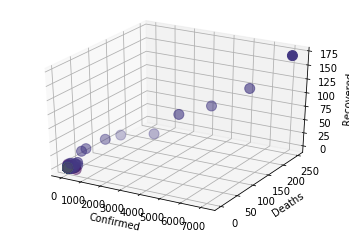

In [210]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d   # must keep
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x_train['Confirmed'], x_train['Deaths'], x_train['Recovered'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('Confirmed')
ax.set_ylabel('Deaths')
ax.set_zlabel('Recovered')
plt.show()